In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/chest-xray-pneumonia


In [5]:
# Set paths
train_dir = path + '/chest_xray/train'

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    validation_split=0.2
)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',  # Normal or Pneumonia
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [6]:
# Build CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.7956 - loss: 0.4444 - val_accuracy: 0.8821 - val_loss: 0.2473
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 82s 627ms/step - accuracy: 0.9151 - loss: 0.2085 - val_accuracy: 0.9032 - val_loss: 0.2580
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 84s 638ms/step - accuracy: 0.9242 - loss: 0.1982 - val_accuracy: 0.9214 - val_loss: 0.1955
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 82s 629ms/step - accuracy: 0.9318 - loss: 0.1781 - val_accuracy: 0.9319 - val_loss: 0.1681
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 90s 690ms/step - accuracy: 0.9445 - loss: 0.1605 - val_accuracy: 0.9329 - val_loss: 0.1698
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 90s 690ms/step - accuracy: 0.9400 - loss: 0.1531 - val_accuracy: 0.9329 - val_loss: 0.1551
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 89s 683ms/step - accuracy: 0.9470 - loss: 0.1477 - val_accuracy: 0.9319 - val_loss: 0.1721
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 83s 636ms/step - accuracy: 0.9463 - loss: 0.1

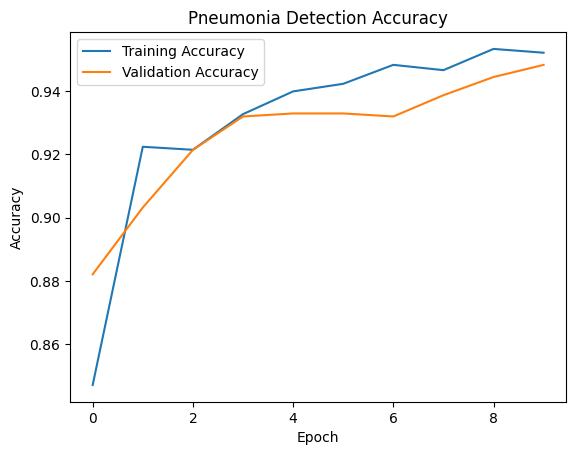

In [9]:
# Plot results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Pneumonia Detection Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Evaluate model
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 413ms/step - accuracy: 0.9408 - loss: 0.1455
Validation Accuracy: 0.9425


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


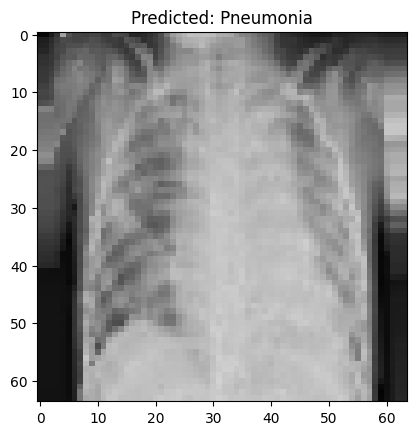

In [11]:
# Predict on a sample image
sample_image, _ = next(val_generator)
pred = model.predict(sample_image)
plt.imshow(sample_image[0])
plt.title(f"Predicted: {'Pneumonia' if pred[0] > 0.5 else 'Normal'}")
plt.show()